In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt

In [2]:
traindata = pd.read_csv("hr-total-cat-equalized.csv",index_col=0)

In [3]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93313 entries, 65438 to 12592
Data columns (total 65 columns):
age                   93313 non-null int64
length_of_service     93313 non-null int64
KPIs_met >80%         93313 non-null int64
awards_won?           93313 non-null int64
avg_training_score    93313 non-null int64
is_promoted           93313 non-null int64
region_10             93313 non-null int64
region_11             93313 non-null int64
region_12             93313 non-null int64
region_13             93313 non-null int64
region_14             93313 non-null int64
region_15             93313 non-null int64
region_16             93313 non-null int64
region_17             93313 non-null int64
region_18             93313 non-null int64
region_19             93313 non-null int64
region_2              93313 non-null int64
region_20             93313 non-null int64
region_21             93313 non-null int64
region_22             93313 non-null int64
region_23             93313

In [4]:
Y = traindata['is_promoted'].values
X_traindata = traindata.drop('is_promoted', axis=1)
X = X_traindata.values

Split data set into training and test sets

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [6]:
# Import module for fitting
from sklearn.linear_model import LogisticRegression
# Create instance (i.e. object) of LogisticRegression
lrmodel = LogisticRegression(solver='lbfgs')

In [7]:
lrmodel.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [8]:
lrmodel.score(X_train, Y_train)

0.7574302697759487

In [9]:
import statsmodels.api as sm
X2 = sm.add_constant(X_traindata)
logit_model=sm.Logit(Y,X2)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.424139
         Iterations: 35


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                               Results: Logit
Model:                  Logit                Pseudo R-squared:     0.388     
Dependent Variable:     y                    AIC:                  79285.2842
Date:                   2019-06-17 12:08     BIC:                  79899.1257
No. Observations:       93313                Log-Likelihood:       -39578.   
Df Model:               64                   LL-Null:              -64649.   
Df Residuals:           93248                LLR p-value:          0.0000    
Converged:              0.0000               Scale:                1.0000    
No. Iterations:         35.0000                                              
-----------------------------------------------------------------------------
                    Coef.    Std.Err.     z     P>|z|     [0.025     0.975]  
-----------------------------------------------------------------------------
const              -26.1086    0.2355 -110.8862 0.0000    -26.5700   -25.6471
age               

In [10]:
X_traindata.columns

Index(['age', 'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'region_10', 'region_11', 'region_12',
       'region_13', 'region_14', 'region_15', 'region_16', 'region_17',
       'region_18', 'region_19', 'region_2', 'region_20', 'region_21',
       'region_22', 'region_23', 'region_24', 'region_25', 'region_26',
       'region_27', 'region_28', 'region_29', 'region_3', 'region_30',
       'region_31', 'region_32', 'region_33', 'region_34', 'region_4',
       'region_5', 'region_6', 'region_7', 'region_8', 'region_9',
       'Below Secondary', 'Master's & above', 'Finance', 'HR', 'Legal',
       'Operations', 'Procurement', 'R&D', 'Sales & Marketing', 'Technology',
       't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10', 'm', 'r2', 'r3',
       'r4', 'r5', 'referred', 'sourcing'],
      dtype='object')

Select only columns which has p value less than 0.05 and re-run the logistic regression model.

In [11]:
cols = ['age', 'length_of_service', 'KPIs_met >80%', 'awards_won?','avg_training_score', 'region_11', 'region_12',
        'region_16', 'region_17','region_20', 'region_21','region_22', 'region_23', 'region_24', 'region_25', 'region_28', 'region_29',
       'region_31', 'region_32', 'region_33', 'region_34', 'region_4','region_5', 'region_6', 'region_7', 'region_8', 'region_9',
       'Below Secondary', "Master's & above", 'Finance', 'HR', 'Legal','Operations', 'Procurement', 'R&D', 'Sales & Marketing', 'Technology',
       't2', 't3', 't4', 'r2', 'r3', 'r4', 'r5', 'referred', 'sourcing']

In [12]:
X_traindata_final = X_traindata[cols]

X_traindata_final.to_csv('X_traindata_final.csv')

In [14]:
X2 = sm.add_constant(X_traindata_final)
logit_model=sm.Logit(Y,X2)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.424441
         Iterations 8
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.387     
Dependent Variable:   y                  AIC:                79305.7535
Date:                 2019-06-17 12:09   BIC:                79749.6080
No. Observations:     93313              Log-Likelihood:     -39606.   
Df Model:             46                 LL-Null:            -64649.   
Df Residuals:         93266              LLR p-value:        0.0000    
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       8.0000                                           
-----------------------------------------------------------------------
                    Coef.   Std.Err.     z     P>|z|   [0.025   0.975] 
-----------------------------------------------------------------------
const              -26.1265   0.2227 -117.3429 0.0000 -26.5628 

In [15]:
lrmodel.fit(X_train, Y_train)
Y_predictions = lrmodel.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [16]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [17]:
print(classification_report(Y_test,Y_predictions))

              precision    recall  f1-score   support

           0       0.78      0.73      0.75     11977
           1       0.73      0.78      0.76     11352

   micro avg       0.75      0.75      0.75     23329
   macro avg       0.75      0.75      0.75     23329
weighted avg       0.76      0.75      0.75     23329



In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_predictions)

array([[8733, 3244],
       [2497, 8855]], dtype=int64)

In [19]:
print("Accuracy:",accuracy_score(Y_test, Y_predictions))

Accuracy: 0.7539114406961293


In [20]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

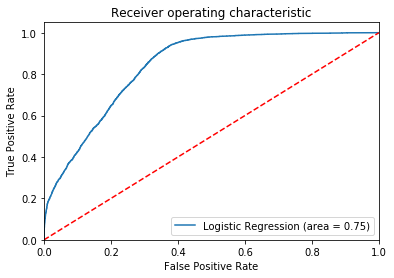

In [21]:
logit_roc_auc = roc_auc_score(Y_test, lrmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, lrmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()